In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import pylab as pl
import numpy as np

In [ ]:
#### Read in your dataset, determine how many samples are present, and ID any missing data

In [2]:
df = pd.read_csv("admissions.csv")
df.head()

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0


In [ ]:
### Below is the full dataset.  From above, below and look at csv file there are 400 samples, 4 columns, 2 missing values for gpa and gre and 1 missing value for prestige

In [7]:
import csv

f = open('admissions.csv')

csv_f = csv.reader(f)

for row in csv_f:
	print row

f.close()

['admit', 'gre', 'gpa', 'prestige']
['0', '380', '3.61', '3']
['1', '660', '3.67', '3']
['1', '800', '4', '1']
['1', '640', '3.19', '4']
['0', '520', '2.93', '4']
['1', '760', '3', '2']
['1', '560', '2.98', '1']
['0', '400', '3.08', '2']
['1', '540', '3.39', '3']
['0', '700', '3.92', '2']
['0', '800', '4', '4']
['0', '440', '3.22', '1']
['1', '760', '4', '1']
['0', '700', '3.08', '2']
['1', '700', '4', '1']
['0', '480', '3.44', '3']
['0', '780', '3.87', '4']
['0', '360', '2.56', '3']
['0', '800', '3.75', '2']
['1', '540', '3.81', '1']
['0', '500', '3.17', '3']
['1', '660', '3.63', '2']
['0', '600', '2.82', '4']
['0', '680', '3.19', '4']
['1', '760', '3.35', '2']
['1', '800', '3.66', '1']
['1', '620', '3.61', '1']
['1', '520', '3.74', '4']
['1', '780', '3.22', '2']
['0', '520', '3.29', '1']
['0', '540', '3.78', '4']
['0', '760', '3.35', '3']
['0', '600', '3.4', '3']
['1', '800', '4', '3']
['0', '360', '3.14', '1']
['0', '400', '3.05', '2']
['0', '580', '3.25', '1']
['0', '520', '2.9', '

In [9]:
df.shape

(400, 4)

In [ ]:
#### Create tables of descriptive statistics for each of the variables (n,mean,median,standard deviation)

In [34]:
df.describe(include='all')

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


In [ ]:
#### Describe the distributions of your data

(array([  3.,   4.,  16.,  33.,  42.,  57.,  76.,  65.,  39.,  63.]),
 array([ 2.26 ,  2.434,  2.608,  2.782,  2.956,  3.13 ,  3.304,  3.478,
         3.652,  3.826,  4.   ]),
 <a list of 10 Patch objects>)

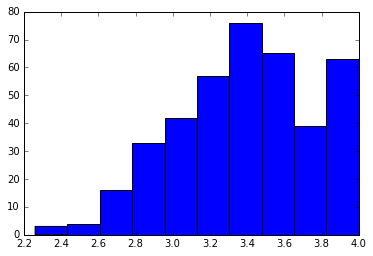

In [11]:
plt.hist(df.gpa.dropna())

(array([  1.,   3.,  16.,  28.,  50.,  75.,  81.,  65.,  44.,  35.]),
 array([ 220.,  278.,  336.,  394.,  452.,  510.,  568.,  626.,  684.,
         742.,  800.]),
 <a list of 10 Patch objects>)

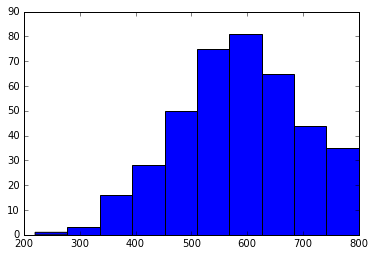

In [12]:
plt.hist(df.gre.dropna())

In [ ]:
### Data appears to be normally distributed

In [ ]:
#### Plot box plots for each variable

{'boxes': [<matplotlib.lines.Line2D at 0xb326b38>],
 'caps': [<matplotlib.lines.Line2D at 0xb36c7f0>,
 'fliers': [<matplotlib.lines.Line2D at 0xb381898>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0xb381320>],
 'whiskers': [<matplotlib.lines.Line2D at 0xb326c50>,
  <matplotlib.lines.Line2D at 0xb36c278>]}

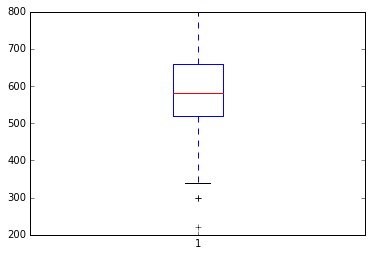

In [18]:
plt.boxplot(df.gre.dropna())

{'boxes': [<matplotlib.lines.Line2D at 0xb3f27b8>],
 'caps': [<matplotlib.lines.Line2D at 0xb402470>,
 'fliers': [<matplotlib.lines.Line2D at 0xb40d518>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0xb402f60>],
 'whiskers': [<matplotlib.lines.Line2D at 0xb3f28d0>,
  <matplotlib.lines.Line2D at 0xb3f2eb8>]}

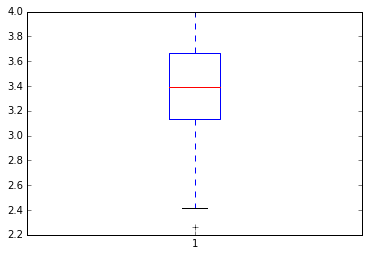

In [19]:
plt.boxplot(df.gpa.dropna())

{'boxes': [<matplotlib.lines.Line2D at 0xb65d588>],
 'caps': [<matplotlib.lines.Line2D at 0xb66c240>,
 'fliers': [<matplotlib.lines.Line2D at 0xb6782e8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0xb66cd30>],
 'whiskers': [<matplotlib.lines.Line2D at 0xb65d6a0>,
  <matplotlib.lines.Line2D at 0xb65dc88>]}

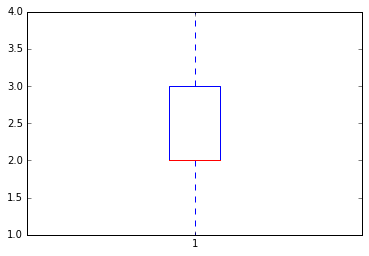

In [20]:
plt.boxplot(df.prestige.dropna())

In [ ]:
#### Create a covariance matrix

In [35]:
df.cov(min_periods=None)

,admit,gre,gpa,prestige
admit,0.217237,9.871271,0.031191,-0.106189
gre,9.871271,13369.953040,16.824761,-13.648068
gpa,0.031191,16.824761,0.144879,-0.021260
prestige,-0.106189,-13.648068,-0.021260,0.893654


In [ ]:
#### Determine any issues or limitations, based upon your exploratory analysis

In [ ]:
### The missing gre, gpa and prestige will have to be imputed using the mean or those records will need to be omitted